<a href="https://colab.research.google.com/github/eafpres/mnist_sklearn/blob/master/Exercise_1_01_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cats and Dogs data from:  
https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765  
This example uses only the first 100 images each of cats and dogs  
  
![](https://drive.google.com/uc?https://drive.google.com/uc?id=1V1hIjUrDNwWd2b9-Q1-3JkVKWpKFSmgA
![](https://drive.google.com/uc?https://drive.google.com/uc?id=19EZLiwR-TGRcNvoojRfrpFfPRgcASBQW


In [0]:
import numpy as np
from numpy import random
%matplotlib inline
from matplotlib import pyplot as plt
from skimage import data, color
from skimage.color import rgb2gray
from skimage.transform import rescale, resize
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [0]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

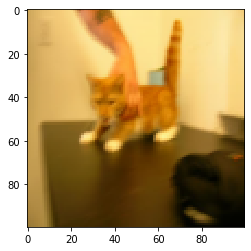

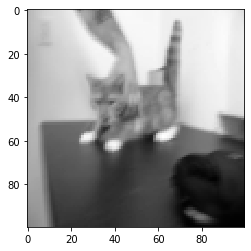

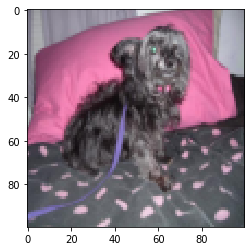

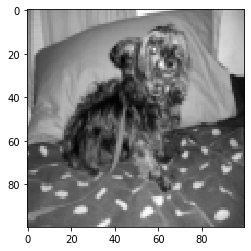

In [0]:
#
# load one example cat
#
file_id = '19EZLiwR-TGRcNvoojRfrpFfPRgcASBQW'
downloaded = drive.CreateFile({'id':file_id}) 
downloaded.GetContentFile('Filename.jpg')
cat = plt.imread('Filename.jpg')
#
# for training, we need all images the same size
# this is not an optimal size necessarily
#
cat = resize(cat, 
             (100, 100),
             anti_aliasing = True)
plt.imshow(cat)
plt.show()
#
# for this exercise, we will convert to grayscale
# this is also not optimal necessarily
#
cat = rgb2gray(cat)
plt.imshow(cat, cmap = plt.cm.gray)
plt.show()
#
# load one example dog
#
file_id = '1V1hIjUrDNwWd2b9-Q1-3JkVKWpKFSmgA'
downloaded = drive.CreateFile({'id':file_id}) 
downloaded.GetContentFile('Filename.jpg')
dog = plt.imread('Filename.jpg')
dog = resize(dog,
             (100, 100),
             anti_aliasing = True)
plt.imshow(dog)
plt.show()
dog = rgb2gray(dog)
plt.imshow(dog, cmap = plt.cm.gray)
plt.show()

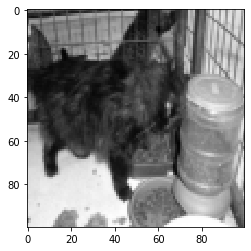

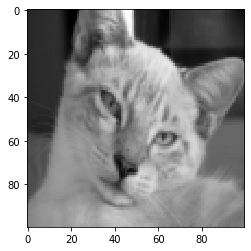

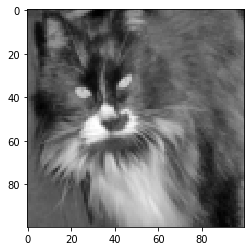

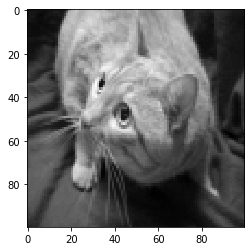

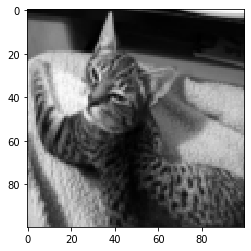

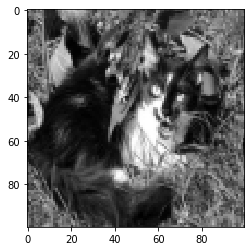

In [0]:
#cats_dir = '1qfkm9QYoHEB-YEHlO1DgsJH6CjXaLLA7'
#
# load the cats
#
cat_file_list = drive.ListFile(
    {'q' : "'1qfkm9QYoHEB-YEHlO1DgsJH6CjXaLLA7' in parents"}).GetList()
my_cat = cat_file_list[0]
this_cat_file = drive.CreateFile({'id' : my_cat['id']}) 
this_cat_file.GetContentFile('Filename.jpg')
this_cat = rgb2gray(resize(plt.imread('Filename.jpg'), (100, 100)))
plt.imshow(this_cat, cmap = plt.cm.gray)
plt.show()
cats = dict({0 : this_cat})
count = 1
for my_cat in cat_file_list[1:]:
  this_cat_file = drive.CreateFile({'id' :  my_cat['id']}) 
  this_cat_file.GetContentFile('Filename.jpg')
  this_cat = rgb2gray(resize(plt.imread('Filename.jpg'), (100, 100)))
  cats[count] = this_cat
  count += 1
cat_samples = random.randint(0, len(cats), 5)
for i in cat_samples:
  plt.imshow(cats[i], cmap = plt.cm.gray)
  plt.show()

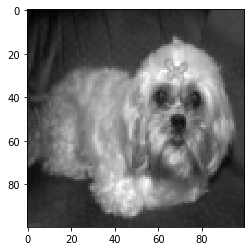

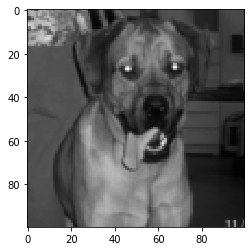

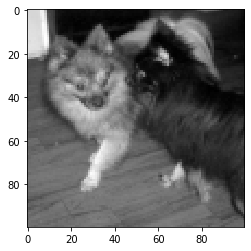

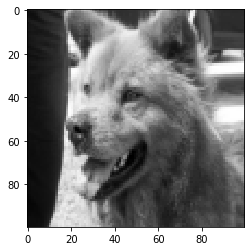

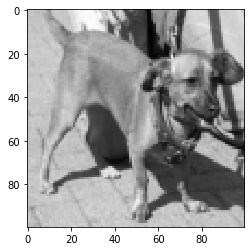

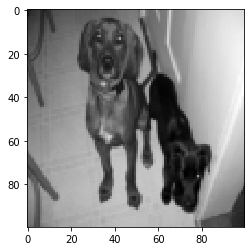

In [0]:
#dogs_dir = '1jYekYnT29ZaejEPsh--jVet6FgI-AwK6'
#
# load the dogs
#
dog_file_list = drive.ListFile(
    {'q' : "'1jYekYnT29ZaejEPsh--jVet6FgI-AwK6' in parents"}).GetList()
my_dog = dog_file_list[0]
this_dog_file = drive.CreateFile({'id' : my_dog['id']}) 
this_dog_file.GetContentFile('Filename.jpg')
this_dog = rgb2gray(resize(plt.imread('Filename.jpg'), (100, 100)))
plt.imshow(this_dog, cmap = plt.cm.gray)
plt.show()
dogs = dict({0 : this_dog})
count = 1
for my_dog in dog_file_list[1:]:
  this_dog_file = drive.CreateFile({'id' :  my_dog['id']}) 
  this_dog_file.GetContentFile('Filename.jpg')
  this_dog = rgb2gray(resize(plt.imread('Filename.jpg'), (100, 100)))
  dogs[count] = this_dog
  count += 1
dog_samples = random.randint(0, len(dogs), 5)
for i in dog_samples:
  plt.imshow(dogs[i], cmap = plt.cm.gray)
  plt.show()

In [0]:
#
# flatten and add labels
# 1 = cat, 0 = dog
# this step "unwraps" the 2D image into a 1 D vector
#
cats_data = {i : cats[i].flatten() for (i, cats[i]) in cats.items()}
cats_array = np.array([cats_data[i] for i in range(len(cats_data))])
cats_labels = np.ones(cats_array.shape[0])
dogs_data = {i : dogs[i].flatten() for (i, dogs[i]) in dogs.items()}
dogs_array = np.array([dogs_data[i] for i in range(len(dogs_data))])
dogs_labels = np.zeros(dogs_array.shape[0])
train_data, val_data, train_labels, val_labels = \
  train_test_split(np.concatenate((cats_array, dogs_array), axis = 0),
                   np.concatenate((cats_labels, dogs_labels)),
                   test_size = 0.1)

In [0]:
#
# train a logistic regression classifier
#
logisticRegr = LogisticRegression(max_iter = 10000, 
                                  tol = 0.000001,
                                  solver = 'liblinear')
logisticRegr.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=1e-06, verbose=0,
                   warm_start=False)

In [0]:
#
# make predictions
#
predictions = logisticRegr.predict(val_data)
errs = ([abs(predictions[i] - val_labels[i]) for i in range(len(predictions))])
print('val accuracy = ', 100 * (1 - (sum(errs) / len(predictions))))

val accuracy =  65.0


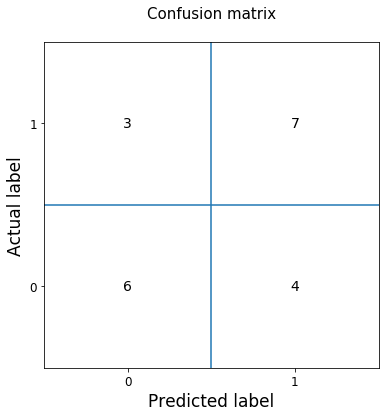

In [0]:
#
# evaluate the model using a confusion matrix
#
cm = metrics.confusion_matrix(val_labels, predictions)
#
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.set_title('Confusion matrix\n', size = 15)
tick_marks = [0.5, 1.5]
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_xticks(tick_marks)
ax.set_xticklabels(('0', '1'))
ax.set_yticks(tick_marks)
ax.set_yticklabels(('0', '1'))
ax.set_ylabel('Actual label', size = 17)
ax.set_xlabel('Predicted label', size = 17)
ax.tick_params(labelsize = 12)
ax.axvline(x = 1, ymin = 0, ymax = 2)
ax.axhline(y = 1, xmin = 0, xmax = 2)
#
for x in [0, 1]:
  for y in [0, 1]:
    ax.annotate(str(cm[x][y]), xy = (x + 0.5, y + 0.5),
                horizontalalignment = 'center',
                verticalalignment = 'center',
                fontsize = 14)